<a href="https://colab.research.google.com/github/ebribi/nyc-overtime-analysis/blob/main/EBribiesca_Project_CISC3225.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# In order to support easy access to the NYC City Payroll dataset, I exported the dataset (filtered to include only records from 2024)
# from NYC Open Data (https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e/data_preview) and uploaded the .csv file
# to a personal GitHub page. The GitHub webpage is referenced below.

city_payroll_df = pd.read_csv("https://raw.githubusercontent.com/ebribi/cisc-3225/refs/heads/main/Citywide_Payroll_Data__Fiscal_Year__20250426.csv")

# Data Processing & Missing Values

In [ ]:
# After loading the City Payroll dataset into a Pandas dataframe, I used the .head function to get an initial observation of the data frame and ensure
# the .csv loaded as expected.

city_payroll_df.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2024,67,ADMIN FOR CHILDREN'S SVCS,FINCH,ROBERT,J,07/06/1997,MANHATTAN,ADMINISTRATIVE STAFF ANALYST,CEASED,149836.00,per Annum,0.0,0.00,0.0,0.00,42663.75
1,2024,67,ADMIN FOR CHILDREN'S SVCS,MCGRATH,MATTHEW,M,04/15/2013,BROOKLYN,EXECUTIVE AGENCY COUNSEL,CEASED,139472.00,per Annum,0.0,0.00,0.0,0.00,44431.16
2,2024,67,ADMIN FOR CHILDREN'S SVCS,AGEDA,ADRIAN,A,03/28/2022,BROOKLYN,STATIONARY ENGINEER,ACTIVE,555.84,per Day,2080.0,155658.17,1444.5,165480.45,48034.45
3,2024,67,ADMIN FOR CHILDREN'S SVCS,HOWARD-COOPER,ELLEN,NaN,03/12/2018,MANHATTAN,ADMINISTRATIVE STAFF ANALYST,CEASED,198734.00,per Annum,0.0,0.00,0.0,0.00,49623.94
4,2024,67,ADMIN FOR CHILDREN'S SVCS,STEVENS,DAMARIS,O,05/16/2016,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ACTIVE,67899.00,per Annum,1820.0,65567.23,452.5,24085.94,50475.66


In [ ]:
# Then, I used .info to explore exactly what data types are stored in each column and which columns contain nul (and possibly missing) values

# While 6 columns across the dataset contain null values, the Mid Init colmun contains significantly more missing values than any other column with null values.
# The other columns with null values are: Last Name, First Name, Agency State Date, Work Location Borough, and Title Description

city_payroll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562898 entries, 0 to 562897
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Fiscal Year                 562898 non-null  int64  
 1   Payroll Number              562898 non-null  int64  
 2   Agency Name                 562898 non-null  object 
 3   Last Name                   562482 non-null  object 
 4   First Name                  562470 non-null  object 
 5   Mid Init                    327420 non-null  object 
 6   Agency Start Date           562821 non-null  object 
 7   Work Location Borough       562897 non-null  object 
 8   Title Description           562830 non-null  object 
 9   Leave Status as of June 30  562898 non-null  object 
 10  Base Salary                 562898 non-null  float64
 11  Pay Basis                   562898 non-null  object 
 12  Regular Hours               562898 non-null  float64
 13  Regular Gross 

In [ ]:
# The Agency Start Date column is initially loaded into the dataframe as a Pandas object. Because I want to do math operations on the dates (find earliest start dates,
# average start dates, etc.), I will use the Pandas .to_datetime function to convert the dates to the datetime64 data type which does support math operations.

city_payroll_df['Agency Start Date'] = pd.to_datetime(city_payroll_df['Agency Start Date'],errors='coerce',format='%m/%d/%Y')

In [ ]:
# Returning to city_payroll_df.info(), the Agency Start Date column now has 562,800 non-null values, whereas before converting the column to the datetime64
# data type, there were 562,821 non-null values. This increase in null values occurred because I set the errors parameter to 'coerce' when applying the .to_datetime
# function on the Agency Start Date column. 21 entries in the Agency Start Date column were recorded as '12/31/1999' and threw out of bounds errors
# since they could not be converted to the datetime64 data type. 'Coerce' handles these out of bounds errors by replacing the values with NaT (Not a Time) instead,
# a null value in Pandas that behaves like NaN but for datetime values.

city_payroll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562898 entries, 0 to 562897
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fiscal Year                 562898 non-null  int64         
 1   Payroll Number              562898 non-null  int64         
 2   Agency Name                 562898 non-null  object        
 3   Last Name                   562482 non-null  object        
 4   First Name                  562470 non-null  object        
 5   Mid Init                    327420 non-null  object        
 6   Agency Start Date           562800 non-null  datetime64[ns]
 7   Work Location Borough       562897 non-null  object        
 8   Title Description           562830 non-null  object        
 9   Leave Status as of June 30  562898 non-null  object        
 10  Base Salary                 562898 non-null  float64       
 11  Pay Basis                   562898 non-

<Axes: >

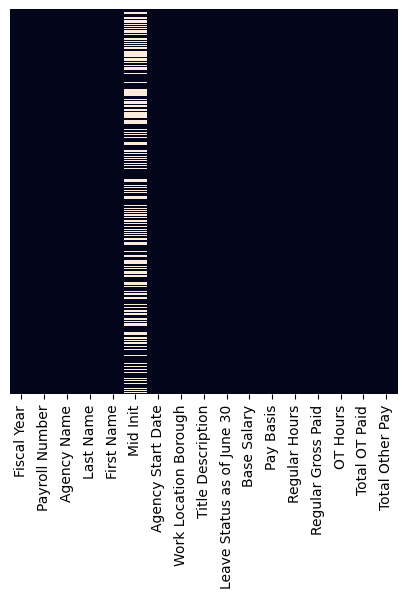

In [ ]:
# The following visualization of null values across the dataframe demonstrates the disproportionate amount of null values in the Mid Init column compared to other
# columns with null values in the dataset. The null values in the other columns are so small in comparison to the size of the entire dataset that they
# actually don't even register in this visualizaiton.

# Further discussion about how null, missing, or erroneous data is handled for this analysis is included in my accompanying written submission.

plt.figure(figsize=(5,5))
sns.heatmap(city_payroll_df.isnull(), cbar=False, yticklabels=False)

<Figure size 500x500 with 0 Axes>

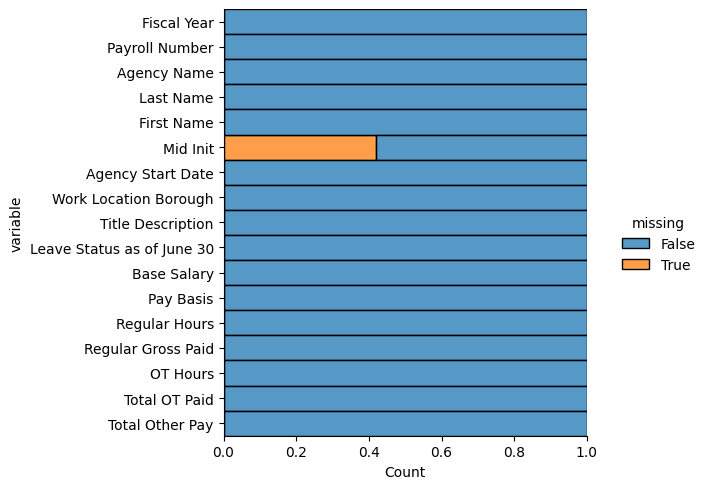

In [ ]:
# I found a reference (https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/)for Seaborn Distribution Plots
# that visualizes missing data across columns in a dataframe.  I wanted to try and see if the missing values
# in the other columns would register on a different visualization of null values, which they do not.
# The x-axis "count" confirms that around half of the data in the Mid Init column is null, and that the distribution of null values
# in other columns is negligible.

plt.figure(figsize=(5,5))
sns.displot(
    data=city_payroll_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
)

In [ ]:
print(city_payroll_df['Agency Name'].value_counts().to_string())

Agency Name
DEPT OF ED PEDAGOGICAL            108209
DEPT OF ED PER SESSION TEACHER     87361
POLICE DEPARTMENT                  65901
DEPT OF ED PARA PROFESSIONALS      41305
BOARD OF ELECTION POLL WORKERS     30529
DEPT OF ED HRLY SUPPORT STAFF      23545
FIRE DEPARTMENT                    21412
DEPARTMENT OF EDUCATION ADMIN      17202
DEPT OF ED PER DIEM TEACHERS       16662
NYC HOUSING AUTHORITY              15612
DEPT OF PARKS & RECREATION         13238
HRA/DEPT OF SOCIAL SERVICES        13101
DEPARTMENT OF SANITATION           12066
DEPARTMENT OF CORRECTION            9081
ADMIN FOR CHILDREN'S SVCS           8336
DEPT OF HEALTH/MENTAL HYGIENE       7938
DEPARTMENT OF TRANSPORTATION        7034
DEPT OF ENVIRONMENT PROTECTION      6976
COMMUNITY COLLEGE (MANHATTAN)       4020
COMMUNITY COLLEGE (LAGUARDIA)       3246
HOUSING PRESERVATION & DVLPMNT      3131
COMMUNITY COLLEGE (KINGSBORO)       2784
DEPT OF CITYWIDE ADMIN SVCS         2744
DEPT. OF HOMELESS SERVICES          2319
COMM

In [ ]:
# I made the decision to combine certain agencies that were recorded as unique entities in the original dataset, like different Community Board numbers
# or Department of Education (DOE) agencies.

# In regards to grouping Borough Community Boards, the records counts are small enough such that combining them does not alter subsequent analysis.
# In regards to grouping DOE agencies, most of the unique DOE agencies were very large and among the most represented agencies in the dataset. Combining them
# into a single "DEPT OF ED" allows for other large agencies to be captured in visualizations while still representing the DOE is the largest entity in the dataset.

# Combining Borough Community Boards

city_payroll_df.loc[city_payroll_df['Agency Name'].str.contains('MANHATTAN COMMUNITY BOARD'),'Agency Name'] = 'MANHATTAN COMMUNITY BOARD'
city_payroll_df.loc[city_payroll_df['Agency Name'].str.contains('BROOKLYN COMMUNITY BOARD'),'Agency Name'] = 'BROOKLYN COMMUNITY BOARD'
city_payroll_df.loc[city_payroll_df['Agency Name'].str.contains('QUEENS COMMUNITY BOARD'),'Agency Name'] = 'QUEENS COMMUNITY BOARD'
city_payroll_df.loc[city_payroll_df['Agency Name'].str.contains('BRONX COMMUNITY BOARD'),'Agency Name'] = 'BRONX COMMUNITY BOARD'
city_payroll_df.loc[city_payroll_df['Agency Name'].str.contains('STATEN ISLAND COMMUNITY BD'),'Agency Name'] = 'STATEN ISLAND COMMUNITY BOARD'

# Combining Dept of Ed Agencies
city_payroll_df.loc[city_payroll_df['Agency Name'].str.contains('DEPT OF ED'),'Agency Name'] = 'DEPT OF ED'
city_payroll_df.loc[city_payroll_df['Agency Name'].str.contains('DEPARTMENT OF EDUCATION ADMIN'),'Agency Name'] = 'DEPT OF ED'

In [ ]:
# The final significant alteration I've chosen to make to the dataset is to remove records with negative amounts of regular or OT hours reported.
# While these values in the dataset might indicate amounts of pay that employees owe back to the City (for reasons that are beyond the scope of this report),
# having negative values in the dataset affects calculations such as average OT reported and skews visualizations.

# The 2 series below show that the number of records being dropped are relatively small compared to the size of the overall dataset, suggesting that
# dropping them does not significantly alter the findings of analysis.

city_payroll_df[city_payroll_df['Regular Hours'] < 0].count()

,0
Fiscal Year,547
Payroll Number,547
Agency Name,547
Last Name,547
First Name,547
Mid Init,348
Agency Start Date,547
Work Location Borough,547
Title Description,547
Leave Status as of June 30,547


In [ ]:
city_payroll_df[city_payroll_df['OT Hours'] < 0].count()

,0
Fiscal Year,141
Payroll Number,141
Agency Name,141
Last Name,141
First Name,141
Mid Init,79
Agency Start Date,141
Work Location Borough,141
Title Description,141
Leave Status as of June 30,141


In [ ]:
# Dropping records with < 0 reported regular or OT hours via mask

city_payroll_df = city_payroll_df[(city_payroll_df['Regular Hours'] >= 0) & (city_payroll_df['OT Hours'] >= 0)]

In [ ]:
# Lastly, I've dropped the singular record with an Agency Start Date that converting the column to a datetime64 type did not remove on its own

city_payroll_df = city_payroll_df[city_payroll_df['Agency Start Date'] != '1901-01-01']

In [ ]:
# Returning to .info illustrates that 666 total records have been dropped from the original dataset of 562,989 records.

# This is the dataset that I will be moving forward with in this report's analysis.

city_payroll_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562232 entries, 0 to 562897
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fiscal Year                 562232 non-null  int64         
 1   Payroll Number              562232 non-null  int64         
 2   Agency Name                 562232 non-null  object        
 3   Last Name                   561816 non-null  object        
 4   First Name                  561804 non-null  object        
 5   Mid Init                    327006 non-null  object        
 6   Agency Start Date           562134 non-null  datetime64[ns]
 7   Work Location Borough       562231 non-null  object        
 8   Title Description           562164 non-null  object        
 9   Leave Status as of June 30  562232 non-null  object        
 10  Base Salary                 562232 non-null  float64       
 11  Pay Basis                   562232 non-null 

# Categorical Variables - Analysis

In [ ]:
# For the final report, I've decided to begin with the categorical variable analysis. I find that describing the dataset in terms
# of distribution of records across agencies, job titles, work locations, leave status, and pay basis offers a better starting
# place for understanding the general makeup of the City's employees and payroll

# Storing the categorical variables in a list for easy reference and readability.

categorical_vars = ['Agency Name','Work Location Borough','Title Description','Leave Status as of June 30','Pay Basis']

In [ ]:
# Calculating the number of unique agencies in the dataset

city_payroll_df["Agency Name"].nunique()

100

In [ ]:
# The printed dataframe shows the value counts for all 101 unique city agencies represented dataset.
# Because there are over 100 different agencies, a bar chart with every City agency is not a realistic or helpful visualization

# (The original City Payroll Data from 2024 had 159 unique agencies, but combining Community Boards and DOE agencies has decreased the number)

print(city_payroll_df['Agency Name'].value_counts().to_string())

Agency Name
DEPT OF ED                        294242
POLICE DEPARTMENT                  65798
BOARD OF ELECTION POLL WORKERS     30529
FIRE DEPARTMENT                    21385
NYC HOUSING AUTHORITY              15562
DEPT OF PARKS & RECREATION         13184
HRA/DEPT OF SOCIAL SERVICES        13085
DEPARTMENT OF SANITATION           12036
DEPARTMENT OF CORRECTION            8987
ADMIN FOR CHILDREN'S SVCS           8274
DEPT OF HEALTH/MENTAL HYGIENE       7916
DEPARTMENT OF TRANSPORTATION        7017
DEPT OF ENVIRONMENT PROTECTION      6950
COMMUNITY COLLEGE (MANHATTAN)       3999
COMMUNITY COLLEGE (LAGUARDIA)       3235
HOUSING PRESERVATION & DVLPMNT      3122
COMMUNITY COLLEGE (KINGSBORO)       2782
DEPT OF CITYWIDE ADMIN SVCS         2740
DEPT. OF HOMELESS SERVICES          2308
COMMUNITY COLLEGE (QUEENSBORO)      2189
DISTRICT ATTORNEY-MANHATTAN         2115
DEPARTMENT OF FINANCE               2111
DEPARTMENT OF BUILDINGS             2104
LAW DEPARTMENT                      1974
TECH

Text(0.5, 0, '# of Employees')

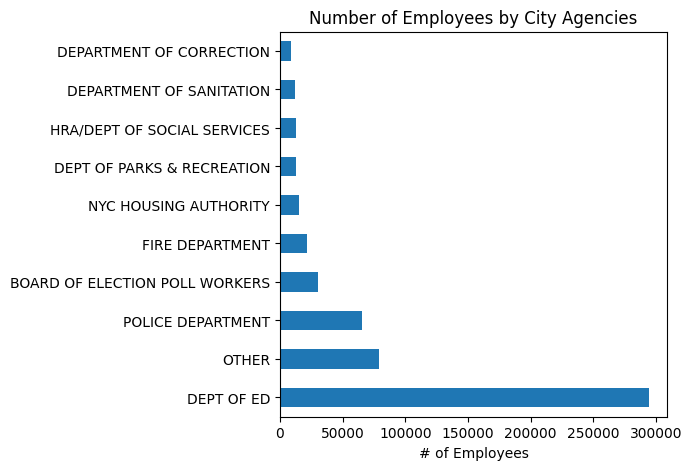

In [ ]:
# Instead, I've decided to present a bar chart with the top 10 largest agencies (stored in the series top_10_agencies) and
# create a temporary copy of the city_payroll_df that replaces all other agencies with "Other." This way, the distribution
# of records across agencies can be better visualized with a bar chart.

# This same technique is replicated for visualizing the other categorical columns with a high number of unique values: Work Location Borough
# and Title Description

top_10_agencies = pd.Series(city_payroll_df['Agency Name'].value_counts().nlargest(10).index)

agency_distribution_df = city_payroll_df.copy()
agency_distribution_df['Agency Name'] = agency_distribution_df['Agency Name'].where(agency_distribution_df['Agency Name'].isin(top_10_agencies), 'OTHER')

plt.figure(figsize=(5,5))
agency_distribution_df["Agency Name"].value_counts().nlargest(10).plot.barh(x="Count",y="Agency Name")
plt.title("Number of Employees by City Agencies")
plt.ylabel("")
plt.xlabel("# of Employees")

In [ ]:
# Below are the number of records for each of the different Work Location Boroughs

city_payroll_df['Work Location Borough'].value_counts()

,count
Work Location Borough,
MANHATTAN,413742
QUEENS,58922
BROOKLYN,49839
BRONX,26387
RICHMOND,7755
OTHER,4320
WESTCHESTER,582
ULSTER,319
SULLIVAN,124


Text(0, 0.5, '')

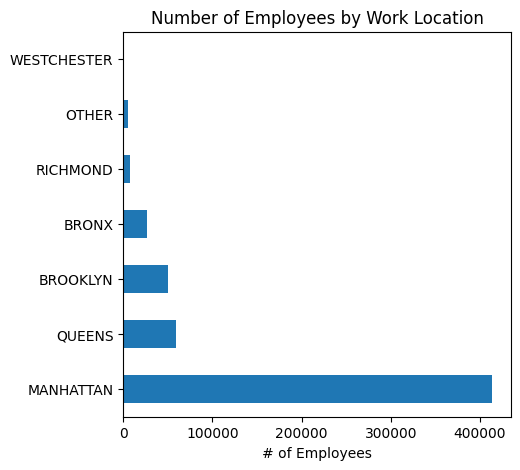

In [ ]:
# While employing the same technique for visualizing the data in the Work Location Borough as was done with Agency Name,
# I've decided to visualize the top 7 work locations in this graph since Westchester (the 7th most represented work location)
# is the first location to be undetectable on the graph at this size.

top_7_locations = pd.Series(city_payroll_df['Work Location Borough'].value_counts().nlargest(7).index)

loc_distribution_df = city_payroll_df.copy()
loc_distribution_df['Work Location Borough'] = loc_distribution_df['Work Location Borough'].where(loc_distribution_df['Work Location Borough'].isin(top_7_locations), 'OTHER')

plt.figure(figsize=(5,5))
loc_distribution_df['Work Location Borough'].value_counts().plot.barh()
plt.title("Number of Employees by Work Location")
plt.xlabel("# of Employees")
plt.xticks([0,100000,200000,300000,400000])
plt.ylabel("")

In [ ]:
# The number of unique Title Descriptions is far larger than even the number of unique values in the Agency Name column.
# This further indicates the need to reduce the number of individual job titles visualized on the bar chart for Title Descriptions.

city_payroll_df['Title Description'].nunique()

1554

In [ ]:
# The number of records for each unique Title Description. Like Agency Name, this series needs to be printed in order for
# all value counts to be visible.

print(city_payroll_df['Title Description'].value_counts().to_string())

Title Description
TEACHER- PER SESSION                                            84378
TEACHER                                                         56684
POLICE OFFICER                                                  31424
ELECTION WORKER                                                 30305
TEACHER SPECIAL EDUCATION                                       29883
ANNUAL ED PARA                                                  28219
TEACHER-GENERAL ED                                              15854
SUBSTITUTE ED PARA                                              12862
FIREFIGHTER                                                      9801
F/T SCHOOL AIDE                                                  9181
SANITATION WORKER                                                7465
COMMUNITY ASSOCIATE                                              6379
COMMUNITY COORDINATOR                                            6345
CORRECTION OFFICER                                               6155
PR

Text(0.5, 0, '# of Employees')

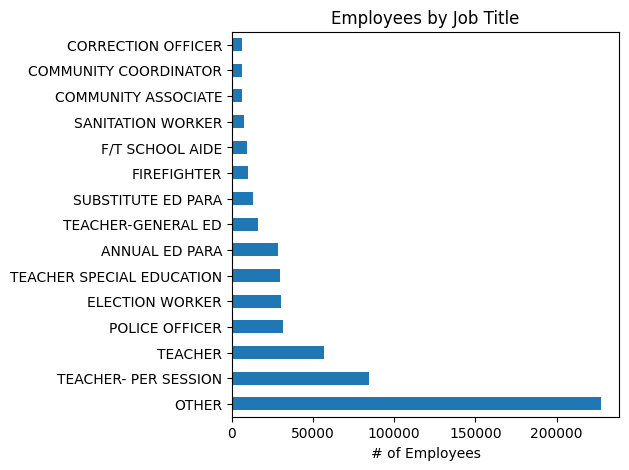

In [ ]:
# I've decided on the keeping the top 14 Title Descriptions for visualizing this column primarily so that
# Correction Officer (part of the DOC, one of the 4 agencies mentioned in Mayor Adams's 2024 directive on OT)
# is included in the grouping.

# Unlike with the Agency Name column, I've decided not to group similar job titles with one another (ex. different titles
# of teacher, etc). I've made this decision because 1,500+ unique titles is too large of a dataset to comb through to ensure
# the groupings have captured each related job title. This report's analysis is more focused on exploring OT reported by agencies
# rather than by specific job titles, so the trade-off is not significant enough to warrant the effort for this particular report.

top_14_jobs = pd.Series(city_payroll_df['Title Description'].value_counts().nlargest(14).index)

job_distribution_df = city_payroll_df.copy()
job_distribution_df['Title Description'] = job_distribution_df['Title Description'].where(job_distribution_df['Title Description'].isin(top_14_jobs), 'OTHER')

plt.figure(figsize=(5,5))
job_distribution_df['Title Description'].value_counts().plot.barh()
plt.title("Employees by Job Title")
plt.ylabel("")
plt.xlabel("# of Employees")

In [ ]:
# The number of records across each different employee Leave Status
# This categorical column is easily visualized without simplifying the grouping/

city_payroll_df['Leave Status as of June 30'].value_counts()

,count
Leave Status as of June 30,
ACTIVE,475383
CEASED,74346
ON LEAVE,6896
SEASONAL,4623
ON SEPARATION LEAVE,984


Text(0.5, 0, '# of Employees')

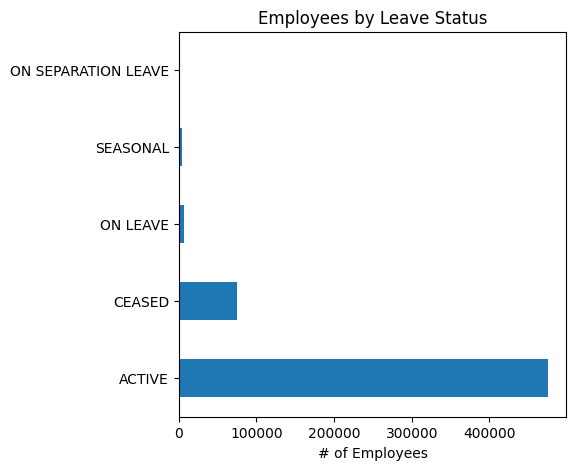

In [ ]:
# Visualizing the value counts in the Leave Status as of June 30 column demonstrates that most employees are on an
# Active status, with the next most common status being "Ceased."

plt.figure(figsize=(5,5))
city_payroll_df['Leave Status as of June 30'].value_counts().plot.barh()
plt.title("Employees by Leave Status")
plt.ylabel("")
plt.xlabel("# of Employees")

In [ ]:
# The number of records across the different Pay Bases in the City Payroll
# Like with the Leave Status column, this column requires no further grouping for visualizing clearly

city_payroll_df['Pay Basis'].value_counts()

,count
Pay Basis,
per Annum,345160
per Day,132717
per Hour,82007
Prorated Annual,2348


Text(0.5, 0, '# of Employees')

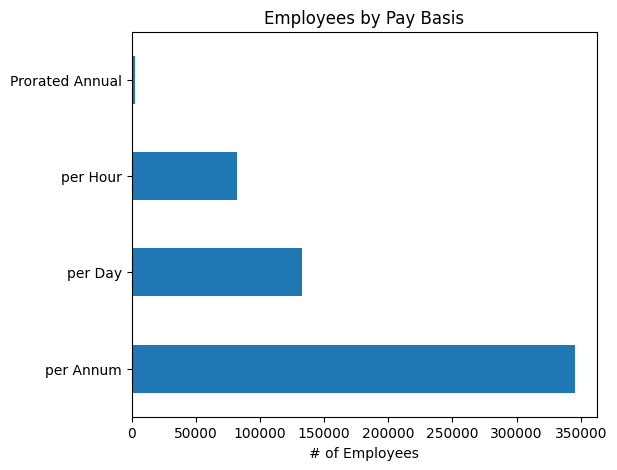

In [ ]:
# Visualizing the value counts in the Pay Basis column demonstrates that most employees are paid on an annual ("Per Annum") basis,
# with the next most common pay basis being per Day followed by per Hour. Pay Basis is the column with the most even
# distribution of data across its unqiue values.

plt.figure(figsize=(6,5))
city_payroll_df['Pay Basis'].value_counts().plot.barh()
plt.title("Employees by Pay Basis")
plt.ylabel("")
plt.xlabel("# of Employees")

# Numeric Variables - Analysis

In [ ]:
# Storing the numeric variables in a list for easy reference and readability.

# The Fiscal Year column is excluded from analysis since all records exported for this report were filtered to the 2024 fiscal year
# I've also chosen to exlude the Payroll Number column since it's adminitrative data that is not relevant to this report's analysis

numeric_vars = ['Agency Start Date','Base Salary','Regular Hours','OT Hours','Total OT Paid','Total Other Pay']

In [ ]:
# Using the .describe function to display the mean, minimum, and maximum values of each numeric variable.

city_payroll_df[numeric_vars].describe()

,Agency Start Date,Base Salary,Regular Hours,OT Hours,Total OT Paid,Total Other Pay
count,562134,562232.000000,562232.000000,562232.000000,562232.000000,562232.000000
mean,2012-03-31 09:21:40.571037952,54809.090914,645.130479,71.842947,5441.162621,6017.141021
min,1955-09-09 00:00:00,0.500000,0.000000,0.000000,-6483.420000,-63208.160000
25%,2005-07-11 00:00:00,33.180000,0.000000,0.000000,0.000000,0.130000
50%,2014-09-08 00:00:00,52695.000000,0.000000,0.000000,0.000000,3000.000000
75%,2020-09-08 00:00:00,99578.000000,1820.000000,0.000000,260.945000,7754.665000
max,2024-09-10 00:00:00,414799.000000,2942.000000,3303.250000,527532.010000,714664.290000
std,NaN,51329.744853,885.597585,187.379227,15530.547952,9742.618154


In [ ]:
# Since the .describe function doesn't calculate median values, I've used the .median function separately to calculate
# the median values of each numeric variable.

city_payroll_df[numeric_vars].median()

,0
Agency Start Date,2014-09-08 00:00:00
Base Salary,52695.0
Regular Hours,0.0
OT Hours,0.0
Total OT Paid,0.0
Total Other Pay,3000.0


Text(0.5, 1.0, 'Correlation Between Continuous Values')

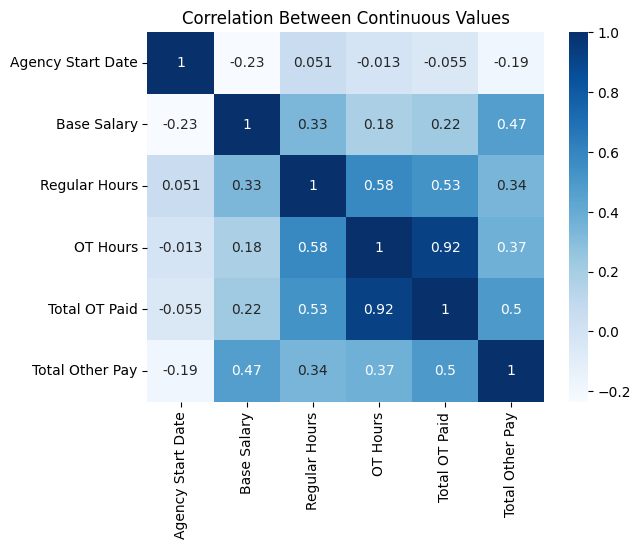

In [ ]:
# The Seaborn heatmap below visualizes the correlations between the numeric variables, where darker blue squares indicate stronger positive
# corelations between 2 variables.

sns.heatmap(city_payroll_df[numeric_vars].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Continuous Values")

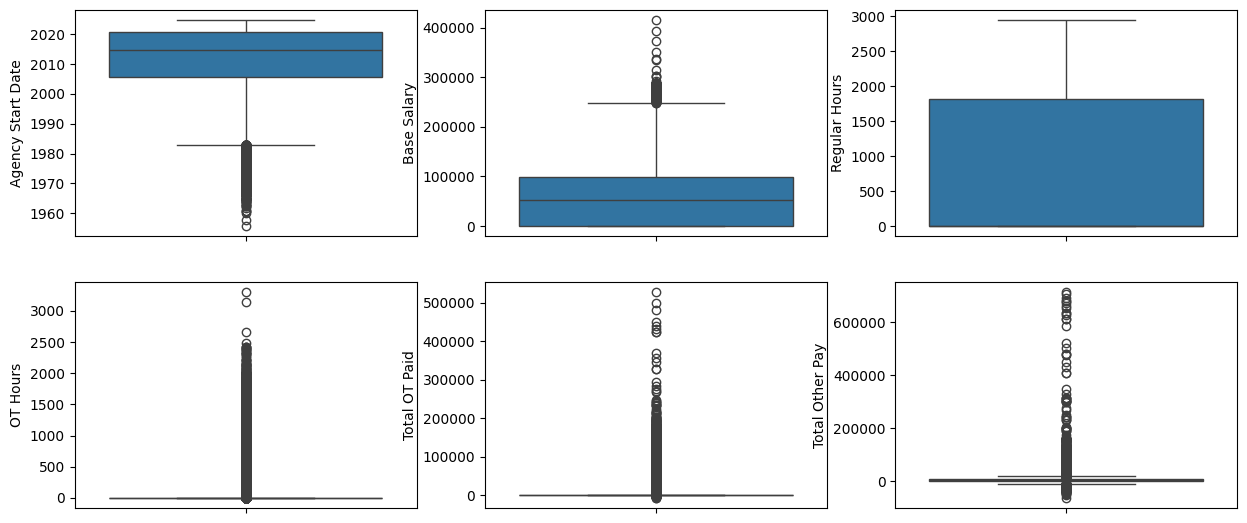

In [ ]:
# The boxplots below illustrate the distribution of data across the dataset's numeric variables. These visualizations are especially
# helpful with identifying variables that have large amounts of outliers, such as OT Hours, Total OT Paid, and Total Other Hours.

plt.figure(figsize=(15,10))

for i in range(len(numeric_vars)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y = city_payroll_df[numeric_vars[i]])
    plt.tight_layout

# High-Level Analysis

In [ ]:
# The primary focus of my analysis thus far is on OT Hour distribution across the City's agencies, and I've taken a particular interest in the
# outlier points of OT Hour data. I think there's a LOT of possible analysis with the City Payroll dataset, but I'm open to feedback on whether analysis
# of OT Hour distribution is too narrow and needs supplemental analysis of additional variables (base salary, employee tenure, etc.) or if it's
# better to limit the scope of my analysis to be successful in this course's final project.

# Right now, the biggest statistical tests I have included are a linear regression and chi-squared test. I've set up this notebook in the general
# structure I'd hope to introduce my findings in the final report, but I'm open to any feedback on what directions are unneccesary and what
# questions are the most intersting to focus on.

In [ ]:
# First Question - Which agencies have the most employees logging overtime hours?

# I'll begin by looking at total count of OT hours by agency

# The top 5 agencies reporting OT hours are: NYPD, FDNY, Department of Correction, NYCHA, and Dept of Social Services

print(city_payroll_df.groupby('Agency Name')['OT Hours'].sum().sort_values(ascending=False).to_string())

Agency Name
POLICE DEPARTMENT                 14756511.68
FIRE DEPARTMENT                    7059545.26
DEPARTMENT OF CORRECTION           3804215.77
NYC HOUSING AUTHORITY              3357467.00
HRA/DEPT OF SOCIAL SERVICES        2353997.57
DEPARTMENT OF SANITATION           2058800.92
DEPARTMENT OF TRANSPORTATION       1216703.08
ADMIN FOR CHILDREN'S SVCS          1069313.36
DEPT OF ENVIRONMENT PROTECTION      914659.08
DEPT. OF HOMELESS SERVICES          605209.60
DEPT OF PARKS & RECREATION          536278.16
DEPT OF ED                          513205.41
DEPT OF CITYWIDE ADMIN SVCS         512832.14
DEPT OF HEALTH/MENTAL HYGIENE       379793.24
BOARD OF ELECTION                   271958.49
DEPARTMENT OF FINANCE               129923.54
DEPARTMENT OF BUILDINGS              84867.54
DISTRICT ATTORNEY-MANHATTAN          68963.83
DEPARTMENT OF PROBATION              68604.00
HOUSING PRESERVATION & DVLPMNT       66955.33
COMMUNITY COLLEGE (MANHATTAN)        63104.37
LAW DEPARTMENT        

In [ ]:
# But this could be skewed by the number of employees being reported on the payroll for each agency, so we should calculate average OT Hours

# The agencies with the highest average of reported OT Hours are: Dept of Corrections, FDNY, Dept of Homeless Serivces, NYPD, and Board of Elections

# 4 of the 5 also had the highest total OT Hours reported. This could indicate that the agencies with the largest amount of total OT Hours have employees that
# are just generally working a lot of overtime.

print(city_payroll_df.groupby('Agency Name')['OT Hours'].mean().sort_values(ascending=False).to_string())

Agency Name
DEPARTMENT OF CORRECTION          423.302077
FIRE DEPARTMENT                   330.116683
DEPT. OF HOMELESS SERVICES        262.222530
POLICE DEPARTMENT                 224.269912
BOARD OF ELECTION                 222.188309
NYC HOUSING AUTHORITY             215.747783
DEPT OF CITYWIDE ADMIN SVCS       187.165015
HRA/DEPT OF SOCIAL SERVICES       179.900464
DEPARTMENT OF TRANSPORTATION      173.393627
DEPARTMENT OF SANITATION          171.053583
DEPT OF ENVIRONMENT PROTECTION    131.605623
ADMIN FOR CHILDREN'S SVCS         129.237776
NYC EMPLOYEES RETIREMENT SYS       86.286624
OFFICE OF EMERGENCY MANAGEMENT     72.980104
DEPARTMENT OF FINANCE              61.545969
DEPARTMENT OF PROBATION            58.485934
CAMPAIGN FINANCE BOARD             54.155855
DEPT OF HEALTH/MENTAL HYGIENE      47.977923
NYC FIRE PENSION FUND              47.949153
NYC POLICE PENSION FUND            41.045058
DEPT OF PARKS & RECREATION         40.676438
TAXI & LIMOUSINE COMMISSION        40.48696

In [ ]:
city_payroll_df.groupby('Agency Name')['Total OT Paid'].sum().sort_values(ascending=False).astype('int64')

,Total OT Paid
Agency Name,
POLICE DEPARTMENT,1259921831
FIRE DEPARTMENT,599064471
DEPARTMENT OF CORRECTION,282546488
NYC HOUSING AUTHORITY,208119207
DEPARTMENT OF SANITATION,164232409
...,...
PUBLIC ADMINISTRATOR-KINGS,0
STATEN ISLAND COMMUNITY BOARD,0
QUEENS COMMUNITY BOARD,0


In [ ]:
# Calculating the median OT Hours by agency mostly confirms this.

# The top 5 agencies by median OT Hours reported are: Dept of Correction, FDNY, NYPD, Dept of Sanitation, and Board of Election

# The Dept of Correction, FDNY, and NYPD seem to consistently be amongst the top OT reporters by total OT Hours, mean, and median

city_payroll_df.groupby('Agency Name')['OT Hours'].median().sort_values(ascending=False)

,OT Hours
Agency Name,
DEPARTMENT OF CORRECTION,349.90
FIRE DEPARTMENT,291.25
POLICE DEPARTMENT,164.75
DEPARTMENT OF SANITATION,146.00
BOARD OF ELECTION,137.75
...,...
STATEN ISLAND COMMUNITY BOARD,0.00
TAX COMMISSION,0.00
TAXI & LIMOUSINE COMMISSION,0.00


In [ ]:
# However, across the entire payroll we see that there's an odd discrepancy between median OT Hours (0) and average OT hours (71.75). This suggests
# that there are strong outlier data points that have extremely large numbers of OT Hours reported

print("Median OT Hours reported across city payroll:", city_payroll_df['OT Hours'].median())
print("Mean OT Hours reported across city payroll:", city_payroll_df['OT Hours'].mean())

Median OT Hours reported across city payroll: 0.0
Mean OT Hours reported across city payroll: 71.84294739538126


In [ ]:
print(city_payroll_df['Agency Name'].value_counts().to_string())

Agency Name
DEPT OF ED                        294242
POLICE DEPARTMENT                  65798
BOARD OF ELECTION POLL WORKERS     30529
FIRE DEPARTMENT                    21385
NYC HOUSING AUTHORITY              15562
DEPT OF PARKS & RECREATION         13184
HRA/DEPT OF SOCIAL SERVICES        13085
DEPARTMENT OF SANITATION           12036
DEPARTMENT OF CORRECTION            8987
ADMIN FOR CHILDREN'S SVCS           8274
DEPT OF HEALTH/MENTAL HYGIENE       7916
DEPARTMENT OF TRANSPORTATION        7017
DEPT OF ENVIRONMENT PROTECTION      6950
COMMUNITY COLLEGE (MANHATTAN)       3999
COMMUNITY COLLEGE (LAGUARDIA)       3235
HOUSING PRESERVATION & DVLPMNT      3122
COMMUNITY COLLEGE (KINGSBORO)       2782
DEPT OF CITYWIDE ADMIN SVCS         2740
DEPT. OF HOMELESS SERVICES          2308
COMMUNITY COLLEGE (QUEENSBORO)      2189
DISTRICT ATTORNEY-MANHATTAN         2115
DEPARTMENT OF FINANCE               2111
DEPARTMENT OF BUILDINGS             2104
LAW DEPARTMENT                      1974
TECH

Text(0.5, 1.0, 'OT Hours vs. Agency Size')

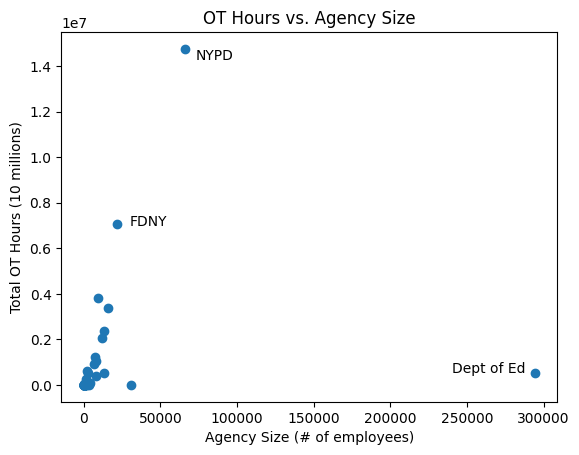

In [ ]:
# But could it just be that the larger agencies with the most employees have the most demanding hours and require more OT?

# Create a scatter plot to see if there's any relationship between agency size and OT hours. If there was a positive correlation, we'd expect to see that reflected
# in the scatter plot... but there's not.

# Some very large agencies have a very low average OT reported, and others have very high ones.

agency_df = pd.DataFrame(city_payroll_df.groupby('Agency Name')["OT Hours"].sum())
agency_df['size'] = city_payroll_df['Agency Name'].value_counts()

plt.scatter(agency_df['size'],agency_df['OT Hours'])
plt.xlabel("Agency Size (# of employees)")
plt.ylabel("Total OT Hours (10 millions)")
plt.text(240000,520000,'Dept of Ed')
plt.text(73000,14300000,'NYPD')
plt.text(30000,7000000,'FDNY')
#plt.text(0,4200000,'DOC')
plt.title("OT Hours vs. Agency Size")

<Axes: xlabel='size', ylabel='OT Hours'>

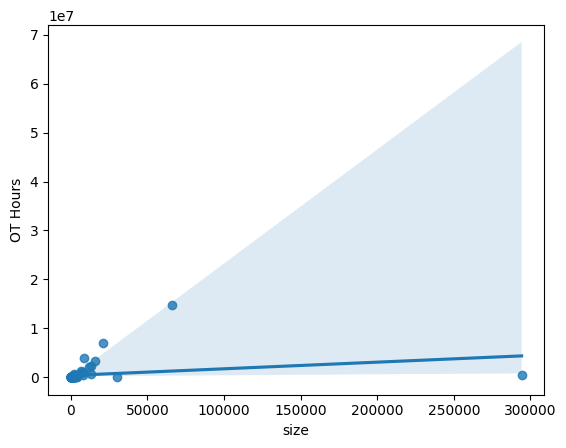

In [ ]:
# Just to check, I want to try fitting a line to this scatter plot to confirm whether there is a relationship between agency size and
# number of OT Hours reported

sns.regplot(agency_df, x='size', y='OT Hours')

In [ ]:
# There is a weak/moderate positive correlation between agency size and total reported OT Hours, which is statistically significant
# at p < 0.01 (r=0.412, p=~0, slope=43.252)

# This is a correlation that didn't get captured by the standard correlation matrix between numeric variables in the correlation matrix from
# the exploratory analysis.

stats.linregress(agency_df['size'], agency_df['OT Hours'])

LinregressResult(slope=np.float64(13.585812773304795), intercept=np.float64(327540.253128393), rvalue=np.float64(0.2390084115919793), pvalue=np.float64(0.016627001465380466), stderr=np.float64(5.575533856460121), intercept_stderr=np.float64(170438.38697280455))

Text(0, 0.5, 'Total OT Hours')

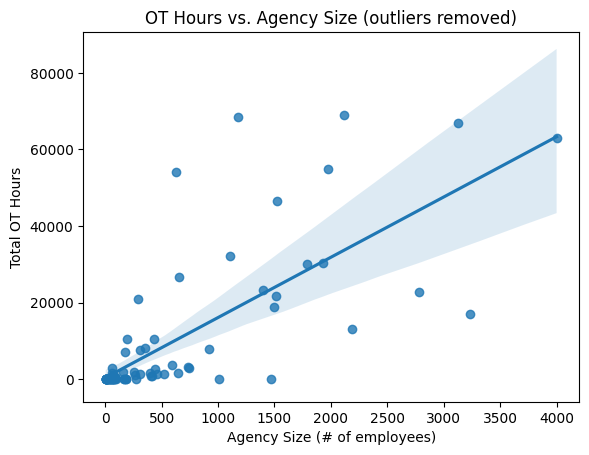

In [ ]:
hours_q1 = agency_df['OT Hours'].quantile(0.25)
hours_q3 = agency_df['OT Hours'].quantile(0.75)
hours_IQR = hours_q3 - hours_q1
hours_upper = hours_q3 + (1.5 * hours_IQR)

size_q1 = agency_df['size'].quantile(0.25)
size_q3 = agency_df['size'].quantile(0.75)
size_IQR = size_q3 - size_q1
size_upper = size_q3 + (1.5 * size_IQR)
size_lower = size_q1 - (1.5 * IQR)

no_outliers_agency_df = agency_df.loc[(agency_df['OT Hours'] < hours_upper) & (agency_df['size'] < size_upper)]

sns.regplot(no_outliers_agency_df, x='size', y='OT Hours')
plt.title("OT Hours vs. Agency Size (outliers removed)")
plt.xlabel("Agency Size (# of employees)")
plt.ylabel("Total OT Hours")

In [ ]:
stats.linregress(no_outliers_agency_df['size'], no_outliers_agency_df['OT Hours'])

LinregressResult(slope=np.float64(15.74662080940212), intercept=np.float64(371.89315288010766), rvalue=np.float64(0.7457511562595875), pvalue=np.float64(9.16148145647949e-16), stderr=np.float64(1.5727840746692336), intercept_stderr=np.float64(1596.2744132218982))

<Axes: ylabel='OT Hours'>

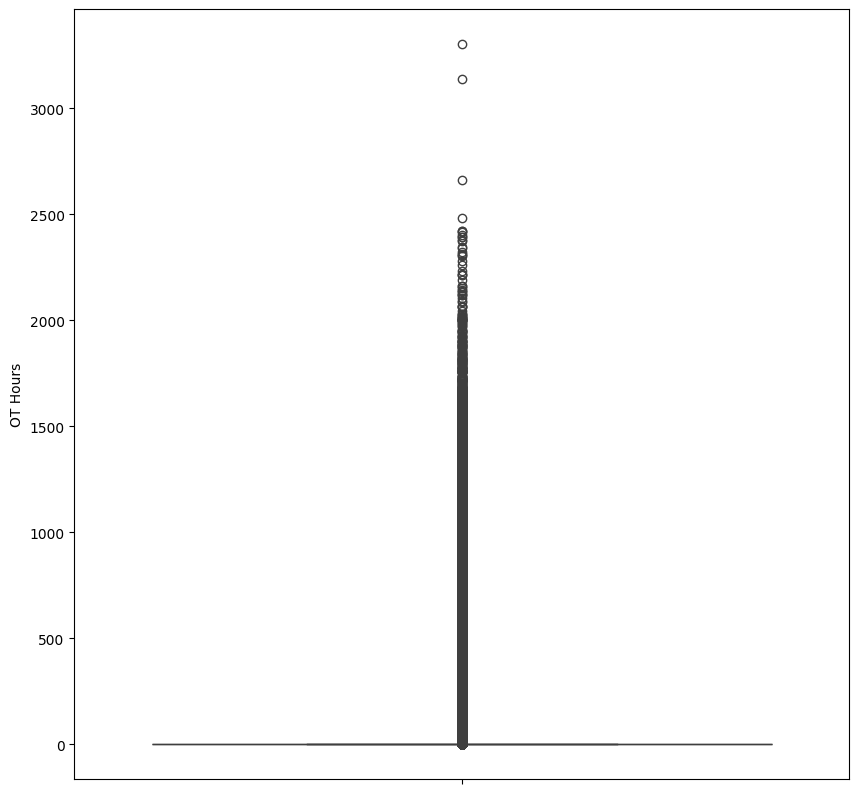

In [ ]:
# However, this relationnship doesn't explain the really big OT Hours outliers. Some employees had logged as many as 3,000 hours of OT in a year, which is over
# 50 hours of OT in a 52 week year.

# Returning to the box plot of OT hours to get a sense for what values were outliers in the dataset...

plt.figure(figsize=(10,10))
sns.boxplot(y = city_payroll_df['OT Hours'])

In [ ]:
# However, this may be because such a large amount of employees have 0 OT hours reported

city_payroll_df['OT Hours'].describe()

,OT Hours
count,562232.000000
mean,71.842947
std,187.379227
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3303.250000


(array([0, 1]), [Text(0, 0, '0 hours'), Text(1, 0, 'more than 0 hours')])

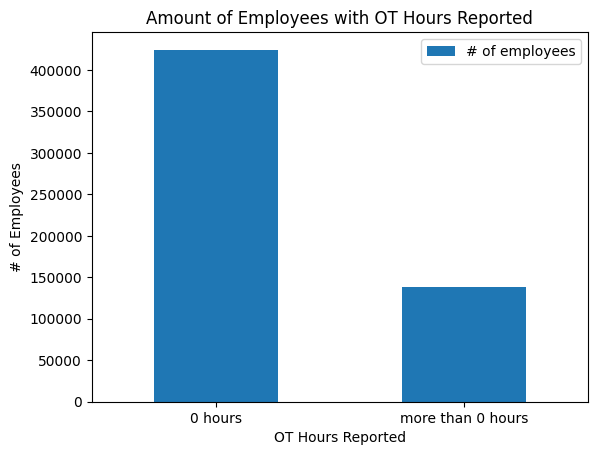

In [ ]:
# MOST employees have 0 OT Hours reported on the city Payroll.

plotdata = pd.DataFrame(
    {"# of employees":[city_payroll_df[city_payroll_df['OT Hours'] == 0]['OT Hours'].count(),city_payroll_df[city_payroll_df['OT Hours'] > 0]['OT Hours'].count()]},
     index=["0 hours","more than 0 hours"]
)

plotdata.plot.bar()
plt.title("Amount of Employees with OT Hours Reported")
plt.xlabel("OT Hours Reported")
plt.ylabel("# of Employees")
plt.xticks(rotation=0, horizontalalignment="center")


In [ ]:
print("Number of records with 0 OT Hours reported:",city_payroll_df[city_payroll_df['OT Hours'] == 0]['OT Hours'].count())
print("Number of records with more than 0 OT Hours reported:",city_payroll_df[city_payroll_df['OT Hours'] > 0]['OT Hours'].count())

Number of records with 0 OT Hours reported: 424379
Number of records with more than 0 OT Hours reported: 137853


In [ ]:
# If we drop all 425,037 records that have 0 OT hours reported, we can get a sense for what the distribution of OT hours is for employees
# that DID have OT Hours reported on the city payroll

OT_df = city_payroll_df[city_payroll_df['OT Hours'] > 0]
OT_df['OT Hours'].describe()

,OT Hours
count,137853.000000
mean,293.010700
std,279.992027
min,0.020000
25%,65.750000
50%,224.750000
75%,439.770000
max,3303.250000


Text(0.5, 1.0, 'Employees Reporting Any Overtime')

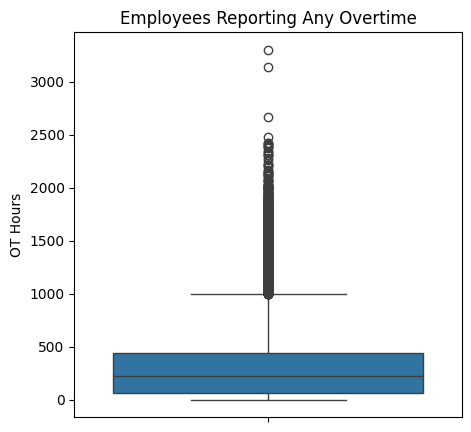

In [ ]:
# We see now that the average number of OT Hours reported amongst employees that did have OT reported is 292 hours.
# But there's still a massive difference between the average amount of OT Hours reported by employees and the outliers who have 1,000+ hours reported
# in Fiscal Year 2024

plt.figure(figsize=(5,5))
sns.boxplot(y = OT_df['OT Hours'])
plt.title("Employees Reporting Any Overtime")

In [ ]:
# Before going further, maybe it's worth asking -- are these outlier values contained to certain agencies, perhaps the ones with the highest amount of OT
# reported? I suspect so.

# I found the following method of identifying the number of outliers by group here: https://stackoverflow.com/questions/48994157/get-the-number-of-outliers-by-group-in-pandas

# So we were partly correct - the agencies with the most outliers are: Dept of Correction, HRA/Dept of Social Services, FDNY, NYCHA, and NYPD. 3 of these 5
# were in the top 5 agencies in total OT Hours reported

q1 = OT_df['OT Hours'].quantile(0.25)
q3 = OT_df['OT Hours'].quantile(0.75)
IQR = q3 - q1

OT_df['Outlier'] = OT_df['OT Hours'].apply(lambda x: True if (x > q3 + 1.5 * IQR) else False)

print(OT_df.groupby('Agency Name')['Outlier'].sum().astype(int).sort_values(ascending=False).reset_index().to_string())

                       Agency Name  Outlier
0         DEPARTMENT OF CORRECTION      866
1      HRA/DEPT OF SOCIAL SERVICES      488
2                  FIRE DEPARTMENT      406
3            NYC HOUSING AUTHORITY      397
4                POLICE DEPARTMENT      386
5        ADMIN FOR CHILDREN'S SVCS      138
6       DEPT. OF HOMELESS SERVICES      117
7      DEPT OF CITYWIDE ADMIN SVCS      115
8     DEPARTMENT OF TRANSPORTATION       88
9   DEPT OF ENVIRONMENT PROTECTION       63
10   DEPT OF HEALTH/MENTAL HYGIENE       58
11        DEPARTMENT OF SANITATION       34
12           DEPARTMENT OF FINANCE       30
13               BOARD OF ELECTION       11
14                      DEPT OF ED       11
15      DEPT OF PARKS & RECREATION        7
16  DISTRICT ATTORNEY KINGS COUNTY        6
17      COMMUNITY COLLEGE (HOSTOS)        5
18   COMMUNITY COLLEGE (MANHATTAN)        5
19       COMMUNITY COLLEGE (BRONX)        5
20         DEPARTMENT OF BUILDINGS        3
21     DISTRICT ATTORNEY-MANHATT

<ipython-input-748-ac37c035cd92>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OT_df['Outlier'] = OT_df['OT Hours'].apply(lambda x: True if (x > q3 + 1.5 * IQR) else False)


In [ ]:
# Here's the number of points that Seaborn's boxplot determined were outliers

OT_df['Outlier'].value_counts()

,count
Outlier,
False,134602
True,3251


In [ ]:
# We can run a chi-squared test to determine whether we're seeing abnormal amount of outliers in some agencies compared to others

OT_contingency = pd.crosstab(OT_df['Agency Name'], OT_df['Outlier'])
OT_contingency

Outlier,False,True
Agency Name,,
ADMIN FOR CHILDREN'S SVCS,4410,138
ADMIN TRIALS AND HEARINGS,42,0
BOARD OF ELECTION,915,11
BOROUGH PRESIDENT-BRONX,7,0
BOROUGH PRESIDENT-BROOKLYN,1,0
...,...,...
PRESIDENT BOROUGH OF MANHATTAN,1,0
TAX COMMISSION,15,0
TAXI & LIMOUSINE COMMISSION,234,1


In [ ]:
OT_contingency_df = pd.DataFrame(OT_contingency)
print(OT_contingency_df.to_string())

Outlier                         False  True 
Agency Name                                 
ADMIN FOR CHILDREN'S SVCS        4410    138
ADMIN TRIALS AND HEARINGS          42      0
BOARD OF ELECTION                 915     11
BOROUGH PRESIDENT-BRONX             7      0
BOROUGH PRESIDENT-BROOKLYN          1      0
BRONX DISTRICT ATTORNEY           291      0
BUSINESS INTEGRITY COMMISSION      13      0
CAMPAIGN FINANCE BOARD             98      0
CITY CLERK                          6      0
CIVILIAN COMPLAINT REVIEW BD       96      0
COMMUNITY COLLEGE (BRONX)         152      5
COMMUNITY COLLEGE (HOSTOS)         99      5
COMMUNITY COLLEGE (KINGSBORO)     169      1
COMMUNITY COLLEGE (LAGUARDIA)     140      0
COMMUNITY COLLEGE (MANHATTAN)     361      5
COMMUNITY COLLEGE (QUEENSBORO)    123      0
CONSUMER AND WORKER PROTECTION     47      0
CULTURAL AFFAIRS                    9      0
CUNY CENTRAL OFFICE                 4      0
DEPARTMENT FOR THE AGING            3      0
DEPARTMENT

In [ ]:
# The p value is basically 0 and the statistic is HUGE, meaning that there is some statistically significant relationship between outlier OT Hour values and agency

results = stats.chi2_contingency(OT_contingency)
results

Chi2ContingencyResult(statistic=np.float64(5287.52740066125), pvalue=np.float64(0.0), dof=69, expected_freq=array([[4.44074410e+03, 1.07255903e+02],
       [4.10095101e+01, 9.90489870e-01],
       [9.04162057e+02, 2.18379433e+01],
       [6.83491836e+00, 1.65081645e-01],
       [9.76416908e-01, 2.35830921e-02],
       [2.84137320e+02, 6.86267981e+00],
       [1.26934198e+01, 3.06580198e-01],
       [9.56888570e+01, 2.31114303e+00],
       [5.85850145e+00, 1.41498553e-01],
       [9.37360232e+01, 2.26397684e+00],
       [1.53297455e+02, 3.70254547e+00],
       [1.01547358e+02, 2.45264158e+00],
       [1.65990874e+02, 4.00912566e+00],
       [1.36698367e+02, 3.30163290e+00],
       [3.57368588e+02, 8.63141172e+00],
       [1.20099280e+02, 2.90072033e+00],
       [4.58915947e+01, 1.10840533e+00],
       [8.78775217e+00, 2.12247829e-01],
       [3.90566763e+00, 9.43323685e-02],
       [2.92925072e+00, 7.07492764e-02],
       [8.26048704e+02, 1.99512959e+01],
       [8.78775217e+00, 2.12247

In [ ]:
print("DOC Expected Frequency:",results.expected_freq[23])
print("NYPD Expected Frequency:",results.expected_freq[64])
print("FDNY Expected Frequency:",results.expected_freq[43])
print("DSNY Expected Frequency:",results.expected_freq[28])
print("DOE Expected Frequency:",results.expected_freq[24])
print("NYCHA Expected Frequency:",results.expected_freq[54])
print("Dept of Social Services Expected Frequency:",results.expected_freq[46])

DOC Expected Frequency: [6839.8004396  165.1995604]
NYPD Expected Frequency: [43608.73193909  1053.26806091]
FDNY Expected Frequency: [16389.15779852   395.84220148]
DSNY Expected Frequency: [4562.79621046  110.20378954]
DOE Expected Frequency: [518.47737808  12.52262192]
NYCHA Expected Frequency: [9917.46653319  239.53346681]
Dept of Social Services Expected Frequency: [6997.00356177  168.99643823]


<Axes: xlabel='Outlier', ylabel='Agency Name'>

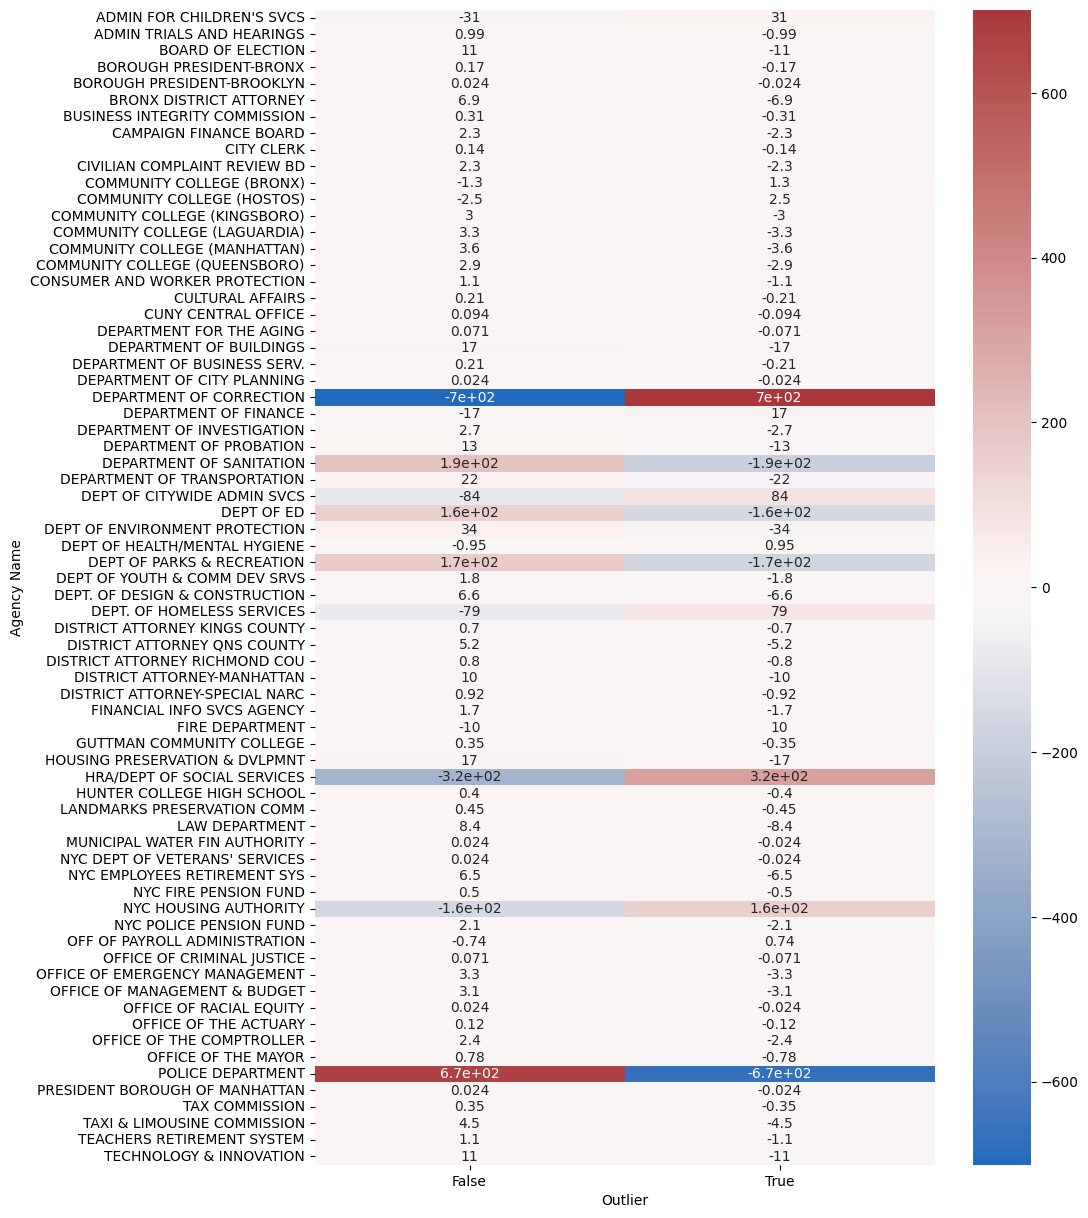

In [ ]:
# When visualizing the exepected frequencies, we see that the Department of Corrections has the most unexpected number of OT Hour outliers of the other agencies.
# The Dept of Social Services comes second to the DOC.

# An unexpected finding is that the NYPD actually has less outliers than the expected frequency.

plt.figure(figsize=(10,15))
sns.heatmap(
    OT_contingency - results.expected_freq,
    cmap='vlag',
    annot=True
)

In [ ]:
# Finally, I want to take a look at the number of OT hours reported by job title
# across the Mayor Adams's big 4 agencies (NYPD, FDNY, DOC, DSNY). What jobs are reporting the most OT,
# especially the unusually large number of OT hours?

indiv_hours_q3 = city_payroll_df['OT Hours'].quantile(0.75)
indiv_hours_q1 = city_payroll_df['OT Hours'].quantile(0.25)
indiv_hours_IQR = q3-q1
indiv_hours_upper = q3 + 1.5 * indiv_hours_IQR

# The upper threshold for what is considered an "outlier" value in terms of OT for an individual is 1,000 hours
# reported for the year. I can use this number to look deeper into what job titles are reporting "outlier"
# levels of OT in the big 4 agencies.
indiv_hours_upper

np.float64(1000.8)

In [ ]:
big_4_df = city_payroll_df[
    (city_payroll_df['Agency Name'] == "DEPARTMENT OF CORRECTION") |
    (city_payroll_df['Agency Name'] == "POLICE DEPARTMENT") |
    (city_payroll_df['Agency Name'] == "DEPARTMENT OF SANITATION") |
    (city_payroll_df['Agency Name'] == "FIRE DEPARTMENT")
]

big_OT_df = big_4_df.loc[big_4_df['OT Hours'] > 1000]

# Consistent with earlier findings that the DOC had an unusually large number of employees reporting
# outlier level OT hours, 22 of the top 25 job titles that had the highest OT reported are from the DOC
big_OT_df[['Agency Name','Title Description','OT Hours']].sort_values('OT Hours',ascending=False)

,Agency Name,Title Description,OT Hours
72937,DEPARTMENT OF CORRECTION,LOCKSMITH,2480.50
65587,DEPARTMENT OF CORRECTION,CAPTAIN,2380.00
71605,DEPARTMENT OF CORRECTION,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,2344.25
65396,DEPARTMENT OF CORRECTION,CAPTAIN,2234.50
64747,DEPARTMENT OF CORRECTION,MARINE ENGINEER,2160.00
...,...,...,...
510587,POLICE DEPARTMENT,POLICE OFFICER,1000.67
435344,FIRE DEPARTMENT,FIREFIGHTER,1000.50
440088,FIRE DEPARTMENT,FIREFIGHTER,1000.18
529100,POLICE DEPARTMENT,POLICE COMMUNICATIONS TECHNICIAN,1000.17


In [ ]:
hours_categories = ['1,000 - 1,2500', '1,2500 - 1,500', '1,500 - 1,750','1,750 - 2,000']

group1 = big_OT_df[big_OT_df['OT Hours'] <= 1250]
group2 = big_OT_df[(big_OT_df['OT Hours'] > 1250) & (big_OT_df['OT Hours'] <= 1500)]
group3 = big_OT_df[(big_OT_df['OT Hours'] > 1500) & (big_OT_df['OT Hours'] <= 1750)]
group4 = big_OT_df[big_OT_df['OT Hours'] > 1750]

print(group1.groupby('Agency Name')['OT Hours'].count().to_string())
print(group2.groupby('Agency Name')['OT Hours'].count().to_string())
print(group3.groupby('Agency Name')['OT Hours'].count().to_string())
print(group4.groupby('Agency Name')['OT Hours'].count().to_string())

Agency Name
DEPARTMENT OF CORRECTION    511
DEPARTMENT OF SANITATION     21
FIRE DEPARTMENT             352
POLICE DEPARTMENT           302
Agency Name
DEPARTMENT OF CORRECTION    227
DEPARTMENT OF SANITATION     10
FIRE DEPARTMENT              48
POLICE DEPARTMENT            76
Agency Name
DEPARTMENT OF CORRECTION    95
DEPARTMENT OF SANITATION     2
FIRE DEPARTMENT              7
POLICE DEPARTMENT            7
Agency Name
DEPARTMENT OF CORRECTION    33
DEPARTMENT OF SANITATION     1
FIRE DEPARTMENT              3
POLICE DEPARTMENT            3


Text(0.5, 0, 'OT hours reported')

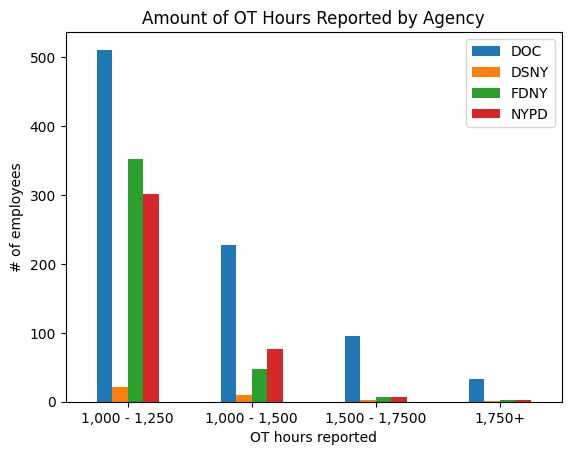

In [ ]:
plot_df = pd.DataFrame(
    [['1,000 - 1,250',511,21,352,302],
     ['1,000 - 1,500',227,10,48,76],
    ['1,500 - 1,7500',95,2,7,7],
     ['1,750+',33,1,3,3]],
     columns=['Hours','DOC', 'DSNY','FDNY','NYPD']
)

plot_df.plot(x='Hours',
             kind='bar',
             stacked=False,
             title='Amount of OT Hours Reported by Agency')
plt.xticks(rotation=0)
plt.ylabel('# of employees')
plt.xlabel('OT hours reported')

In [ ]:
# Since I'm observing such large differences in the graph above, I want to finish by testing if there's
# a significant difference in the average OT hours reported between the DOC and the other big 4

doc_df = big_4_df[big_4_df['Agency Name'] == "DEPARTMENT OF CORRECTION"]
dsny_df = big_4_df[big_4_df['Agency Name'] == "DEPARTMENT OF SANITATION"]
fdny_df = big_4_df[big_4_df['Agency Name'] == "FIRE DEPARTMENT"]
nypd_df = big_4_df[big_4_df['Agency Name'] == "POLICE DEPARTMENT"]

print(stats.ttest_ind(doc_df['OT Hours'],dsny_df['OT Hours']))
print(stats.ttest_ind(doc_df['OT Hours'],fdny_df['OT Hours']))
print(stats.ttest_ind(doc_df['OT Hours'],nypd_df['OT Hours']))

TtestResult(statistic=np.float64(61.335366029428826), pvalue=np.float64(0.0), df=np.float64(21021.0))
TtestResult(statistic=np.float64(22.11634652185133), pvalue=np.float64(1.5567873163715276e-107), df=np.float64(30370.0))
TtestResult(statistic=np.float64(66.35622789272917), pvalue=np.float64(0.0), df=np.float64(74783.0))


In [ ]:
# And the same for the outlier OT hours dataset

doc2_df = big_OT_df[big_OT_df['Agency Name'] == "DEPARTMENT OF CORRECTION"]
dsny2_df = big_OT_df[big_OT_df['Agency Name'] == "DEPARTMENT OF SANITATION"]
fdny2_df = big_OT_df[big_OT_df['Agency Name'] == "FIRE DEPARTMENT"]
nypd2_df = big_OT_df[big_OT_df['Agency Name'] == "POLICE DEPARTMENT"]

print(stats.ttest_ind(doc2_df['OT Hours'],dsny2_df['OT Hours']))
print(stats.ttest_ind(doc2_df['OT Hours'],fdny2_df['OT Hours']))
print(stats.ttest_ind(doc2_df['OT Hours'],nypd2_df['OT Hours']))

TtestResult(statistic=np.float64(1.369814921761034), pvalue=np.float64(0.1710870875494441), df=np.float64(898.0))
TtestResult(statistic=np.float64(10.665122013165151), pvalue=np.float64(1.6999121110096351e-25), df=np.float64(1274.0))
TtestResult(statistic=np.float64(8.374736605164575), pvalue=np.float64(1.4660530802644293e-16), df=np.float64(1252.0))
